In [1]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

from scipy import stats

import seaborn as sns
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Scikit-learn algorithms and functions
from sklearn.neighbors import KNeighborsClassifier # Scikit-learn KNeighbors Classifier
from sklearn.tree import DecisionTreeClassifier # Scikit-learn Decision Tree Classifier
from sklearn.model_selection import KFold # Scikit-learn K-Folds cross-validator
from sklearn.model_selection import cross_val_score # evaluating cross-validator performance
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Display Matplotlib output inline
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(10)

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019
5,30054,27.74,5.12,42.39,5.46,0.076667,-0.020000,45.90,3.99,75.64,...,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,4/1/2021,10/5/2019
6,26431,4.67,5.32,23.99,4.62,0.270000,-0.010000,3.56,4.62,18.57,...,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,4/1/2021,9/13/2019
7,5491,11.49,7.10,18.48,NaN,-0.650000,0.063333,18.21,10.88,23.40,...,0.428571,345.727143,342.172857,19.920000,34.582857,4171.285714,7.166667,54.502857,4/1/2021,11/11/2019
8,43953,35.88,46.05,5.43,4.77,0.830000,-2.486667,47.08,85.63,6.50,...,0.785714,330.151429,332.997857,18.780714,30.125000,4137.428571,3.857143,48.905714,4/1/2021,11/2/2019
9,45081,4.80,41.35,6.09,27.60,-0.003333,0.000000,3.41,75.23,8.67,...,2.666667,356.720952,348.738571,16.782381,26.645238,4157.761905,9.500000,43.427619,4/1/2021,9/19/2019


In [4]:
df_train.describe()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,...,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,...,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,...,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,...,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,...,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,...,84.875000,17.097619,1.470588,351.109967,347.911440,16.201115,25.774365,4159.158948,16.500000,42.005895
75%,38785.250000,30.100000,30.730000,30.060000,29.600000,0.046667,0.060000,50.200000,51.212500,50.300000,...,95.200000,37.000000,2.353416,359.687861,356.837450,18.660114,30.476042,4166.800000,24.285714,49.115667
max,49999.000000,82.550000,98.890000,81.000000,81.890000,9.556667,17.913333,104.550000,110.560000,108.170000,...,145.333333,2013.000000,38.000000,410.957692,420.486000,34.016667,60.746667,4208.900000,418.916667,94.763333


In [5]:
print(df_train['avg_time_charging_lag7'].mean())
print(df_train['avg_time_charging_lag7'].median())
print('=================')
print(df_train['charging_rate_lag7'].mean())
print(df_train['charging_rate_lag7'].median())

16.35508829203152
5.78
-0.05301719027976213
-0.003333333


In [6]:
df_train.shape

(40500, 55)

In [7]:
df_test.shape

(4500, 54)

In [8]:
df_train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

In [9]:
df_train.isnull().sum()/df_train.shape[0]*100
#avg_charge/discharge_time_lag_13/14 >10% missing values

deviceid                        0.000000
avg_time_charging_lag1          0.000000
avg_time_charging_lag2          0.000000
avg_time_charging_lag3          0.000000
avg_time_charging_lag7          0.162963
charging_rate_lag3              0.000000
charging_rate_lag7              0.029630
avg_time_discharging_lag1       0.000000
avg_time_discharging_lag2       0.000000
avg_time_discharging_lag3       0.000000
avg_time_discharging_lag7       0.162963
discharging_rate_lag3           0.000000
discharging_rate_lag7           0.029630
fail_7                          0.000000
charge_cycle_time_below_12      0.000000
avg_time_charging_lag4          0.000000
avg_time_discharging_lag4       0.000000
avg_time_charging_lag5          0.017284
avg_time_discharging_lag5       0.017284
avg_time_charging_lag6          0.069136
avg_time_discharging_lag6       0.069136
avg_time_charging_lag8          0.400000
avg_time_discharging_lag8       0.400000
avg_time_charging_lag9          0.923457
avg_time_dischar

In [10]:
df_test.isnull().sum()

deviceid                         0
avg_time_charging_lag1           0
avg_time_charging_lag2           0
avg_time_charging_lag3           0
avg_time_charging_lag7           3
charging_rate_lag3               0
charging_rate_lag7               1
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_discharging_lag3        0
avg_time_discharging_lag7        3
discharging_rate_lag3            0
discharging_rate_lag7            1
charge_cycle_time_below_12       0
avg_time_charging_lag4           0
avg_time_discharging_lag4        0
avg_time_charging_lag5           1
avg_time_discharging_lag5        1
avg_time_charging_lag6           2
avg_time_discharging_lag6        2
avg_time_charging_lag8          17
avg_time_discharging_lag8       17
avg_time_charging_lag9          43
avg_time_discharging_lag9       43
avg_time_charging_lag10        103
avg_time_discharging_lag10     103
avg_time_charging_lag11        182
avg_time_discharging_lag11     182
avg_time_charging_la

In [11]:
df_test.isnull().sum()/df_test.shape[0]*100

deviceid                        0.000000
avg_time_charging_lag1          0.000000
avg_time_charging_lag2          0.000000
avg_time_charging_lag3          0.000000
avg_time_charging_lag7          0.066667
charging_rate_lag3              0.000000
charging_rate_lag7              0.022222
avg_time_discharging_lag1       0.000000
avg_time_discharging_lag2       0.000000
avg_time_discharging_lag3       0.000000
avg_time_discharging_lag7       0.066667
discharging_rate_lag3           0.000000
discharging_rate_lag7           0.022222
charge_cycle_time_below_12      0.000000
avg_time_charging_lag4          0.000000
avg_time_discharging_lag4       0.000000
avg_time_charging_lag5          0.022222
avg_time_discharging_lag5       0.022222
avg_time_charging_lag6          0.044444
avg_time_discharging_lag6       0.044444
avg_time_charging_lag8          0.377778
avg_time_discharging_lag8       0.377778
avg_time_charging_lag9          0.955556
avg_time_discharging_lag9       0.955556
avg_time_chargin

In [12]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
df_train=df_train.dropna()
X_train=df_train.drop(['deviceid','LastRecord','Date Deployed','fail_7'],axis=1)
Y_train=df_train['fail_7']



In [14]:
gbdt = GradientBoostingClassifier(random_state=0)
gbdt.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=0)

In [15]:
predictions_beforeKNN = gbdt.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score

print('accuracy traning:',accuracy_score(Y_train,predictions_beforeKNN))

accuracy traning: 0.8121009694963348


In [17]:
#function to plot feature imprtance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

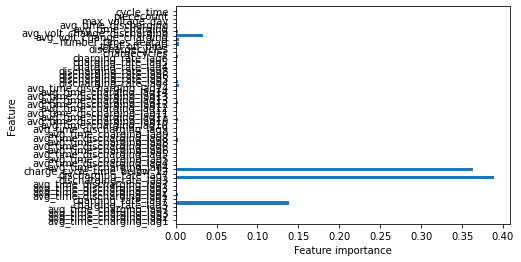

In [18]:
plot_feature_importances(gbdt)

In [19]:
#show all rows, default 10
pd.set_option('display.max_rows', None)
df_featureImportance=pd.DataFrame(gbdt.feature_importances_,index=X_train.columns,columns=['Importance Value'])

df_featureImportance.sort_values(by=['Importance Value'],ascending=False).head(10)

#the first 3 are the most important
#so we can see only aove 0.02 are significantly important, all the rest are equally important in 0.015-0.018

,Importance Value
discharging_rate_lag3,0.389533
charge_cycle_time_below_12,0.362793
charging_rate_lag3,0.138140
avg_volt_change_charging,0.032916
number_times_restart,0.004450
total_off_time,0.004304
avg_time_discharging_lag14,0.003785
discharging_rate_lag4,0.003460
avg_volt_change_discharging,0.003095
charging_rate_lag6,0.002773


In [20]:
from sklearn.impute import KNNImputer

In [21]:
imputer=KNNImputer()

Xtrans=imputer.fit_transform(X_train)






In [22]:
names=X_train.columns

Xtrans_df=pd.DataFrame(Xtrans,columns=names)

Xtrans_df.isnull().sum()

avg_time_charging_lag1         0
avg_time_charging_lag2         0
avg_time_charging_lag3         0
avg_time_charging_lag7         0
charging_rate_lag3             0
charging_rate_lag7             0
avg_time_discharging_lag1      0
avg_time_discharging_lag2      0
avg_time_discharging_lag3      0
avg_time_discharging_lag7      0
discharging_rate_lag3          0
discharging_rate_lag7          0
charge_cycle_time_below_12     0
avg_time_charging_lag4         0
avg_time_discharging_lag4      0
avg_time_charging_lag5         0
avg_time_discharging_lag5      0
avg_time_charging_lag6         0
avg_time_discharging_lag6      0
avg_time_charging_lag8         0
avg_time_discharging_lag8      0
avg_time_charging_lag9         0
avg_time_discharging_lag9      0
avg_time_charging_lag10        0
avg_time_discharging_lag10     0
avg_time_charging_lag11        0
avg_time_discharging_lag11     0
avg_time_charging_lag12        0
avg_time_discharging_lag12     0
avg_time_charging_lag13        0
avg_time_d

In [23]:
gbdt_filled = GradientBoostingClassifier(random_state=0)
gbdt_filled.fit(Xtrans_df, Y_train)
predictions = gbdt_filled.predict(Xtrans_df)

In [24]:
from sklearn.metrics import accuracy_score

print('accuracy traning:',accuracy_score(Y_train,predictions))

# no difference in validation using GBDT after KNNimputing
# and we are clear underfitting

accuracy traning: 0.8121009694963348


In [25]:
df_train['charge_cycle_time_below_12'].value_counts()

True     20079
False    13753
Name: charge_cycle_time_below_12, dtype: int64

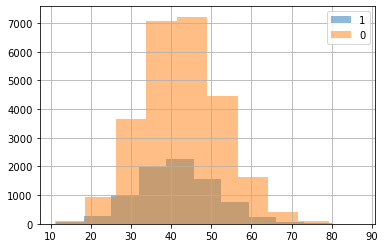

In [26]:
df_train[df_train["fail_7"]==1]["cycle_time"].hist(alpha=0.5)
df_train[df_train["fail_7"]==0]["cycle_time"].hist(alpha=0.5)
plt.legend([1,0])
plt.show()

In [35]:
Xtrans_df.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Train_trans=pd.concat([Xtrans_df,Y_train],axis=1)




In [38]:
Train_trans.isnull().sum().sum()

0

In [39]:
#Train_trans.to_csv('Train_trans.csv',index=False)